<a href="https://colab.research.google.com/github/ashamril/ularsawa/blob/master/Malaysia_CoronaVirus_Covid_19_v5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Forecasting Malaysia daily new covid-19 confirmed (positive) cases using fbprophet
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import calendar
from datetime import date

In [0]:
confirm = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
recover = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")
death = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")


In [0]:
confirm.rename(columns={'Country/Region':'Country'}, inplace=True)
recover.rename(columns={'Country/Region':'Country'}, inplace=True)
death.rename(columns={'Country/Region':'Country'}, inplace=True)

In [0]:
confirm[confirm.Country == 'Malaysia'].melt().tail(2)

,variable,value
78,4/5/20,3662
79,4/6/20,3793


In [0]:
recover[recover.Country == 'Malaysia'].melt().tail(2)

,variable,value
78,4/5/20,1005
79,4/6/20,1241


In [0]:
death[death.Country == 'Malaysia'].melt().tail(2)

,variable,value
78,4/5/20,61
79,4/6/20,62


In [0]:
df_conf_malaysia = confirm[confirm.Country == 'Malaysia']
df_recov_malaysia = recover[recover.Country == 'Malaysia']
df_death_malaysia = death[death.Country == 'Malaysia']

drop_columns = ['Province/State', 'Country', 'Lat', 'Long']
df_conf_malaysia = df_conf_malaysia.drop(drop_columns, axis=1)
df_recov_malaysia = df_recov_malaysia.drop(drop_columns, axis=1)
df_death_malaysia = df_death_malaysia.drop(drop_columns, axis=1)

In [0]:
# # Add 1st April data
# april1 = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-01-2020.csv")
# april1.rename(columns={'Country_Region':'Country'}, inplace=True)
# df_april_malaysia = april1[april1.Country == 'Malaysia']

In [0]:
# # Combine March and April
# df_conf_malaysia['4/1/20'] = df_april_malaysia.Confirmed.values
# df_recov_malaysia['4/1/20'] = df_april_malaysia.Recovered.values
# df_death_malaysia['4/1/20'] = df_april_malaysia.Deaths.values

In [0]:
df_conf_malaysia

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20
153,0,0,0,3,4,4,4,7,8,8,8,8,8,10,12,12,12,16,16,18,18,18,19,19,22,22,22,22,22,22,22,22,22,22,22,22,23,23,25,29,29,36,50,50,83,93,99,117,129,149,149,197,238,428,566,673,790,900,1030,1183,1306,1518,1624,1796,2031,2161,2320,2470,2626,2766,2908,3116,3333,3483,3662,3793


In [0]:
df_recov_malaysia

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20
148,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,3,3,3,3,7,7,7,13,15,15,15,15,15,18,18,18,18,18,18,18,18,22,22,22,22,23,24,24,24,26,26,26,35,42,42,49,60,75,87,114,139,139,183,199,215,259,320,388,479,537,645,767,827,915,1005,1241


In [0]:
df_death_malaysia

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20
153,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,3,4,10,14,16,20,23,26,27,35,37,43,45,50,53,57,61,62


In [0]:
df_conf_malaysia = df_conf_malaysia.melt()
df_conf_malaysia.rename(columns={'variable':'Date', 'value':'Confirmed'}, inplace=True)
df_recov_malaysia = df_recov_malaysia.melt()
df_recov_malaysia.rename(columns={'variable':'Date', 'value':'Recovered'}, inplace=True)
df_death_malaysia = df_death_malaysia.melt()
df_death_malaysia.rename(columns={'variable':'Date', 'value':'Deaths'}, inplace=True)

In [0]:
df_cases_malaysia = df_conf_malaysia.join(df_recov_malaysia['Recovered']).join(df_death_malaysia['Deaths'])
df_cases_malaysia

,Date,Confirmed,Recovered,Deaths
0,1/22/20,0,0,0
1,1/23/20,0,0,0
2,1/24/20,0,0,0
3,1/25/20,3,0,0
4,1/26/20,4,0,0
...,...,...,...,...
71,4/2/20,3116,767,50
72,4/3/20,3333,827,53
73,4/4/20,3483,915,57
74,4/5/20,3662,1005,61


In [0]:
# Using diff to get daily new cases 
df_cases_malaysia['New_Confirmed'] = df_cases_malaysia['Confirmed'].diff()
df_cases_malaysia['New_Recovered'] = df_cases_malaysia['Recovered'].diff()
df_cases_malaysia['New_Deaths'] = df_cases_malaysia['Deaths'].diff()
df_cases_malaysia

,Date,Confirmed,Recovered,Deaths,New_Confirmed,New_Recovered,New_Deaths
0,1/22/20,0,0,0,NaN,NaN,NaN
1,1/23/20,0,0,0,0.0,0.0,0.0
2,1/24/20,0,0,0,0.0,0.0,0.0
3,1/25/20,3,0,0,3.0,0.0,0.0
4,1/26/20,4,0,0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
71,4/2/20,3116,767,50,208.0,122.0,5.0
72,4/3/20,3333,827,53,217.0,60.0,3.0
73,4/4/20,3483,915,57,150.0,88.0,4.0
74,4/5/20,3662,1005,61,179.0,90.0,4.0


In [0]:
df_cases_malaysia.isna().sum()

Date             0
Confirmed        0
Recovered        0
Deaths           0
New_Confirmed    1
New_Recovered    1
New_Deaths       1
dtype: int64

In [0]:
# Replace NaN 
df_cases_malaysia.fillna(0, inplace=True)
df_cases_malaysia.isna().sum()

Date             0
Confirmed        0
Recovered        0
Deaths           0
New_Confirmed    0
New_Recovered    0
New_Deaths       0
dtype: int64

In [0]:
df_cases_malaysia

,Date,Confirmed,Recovered,Deaths,New_Confirmed,New_Recovered,New_Deaths
0,1/22/20,0,0,0,0.0,0.0,0.0
1,1/23/20,0,0,0,0.0,0.0,0.0
2,1/24/20,0,0,0,0.0,0.0,0.0
3,1/25/20,3,0,0,3.0,0.0,0.0
4,1/26/20,4,0,0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
71,4/2/20,3116,767,50,208.0,122.0,5.0
72,4/3/20,3333,827,53,217.0,60.0,3.0
73,4/4/20,3483,915,57,150.0,88.0,4.0
74,4/5/20,3662,1005,61,179.0,90.0,4.0


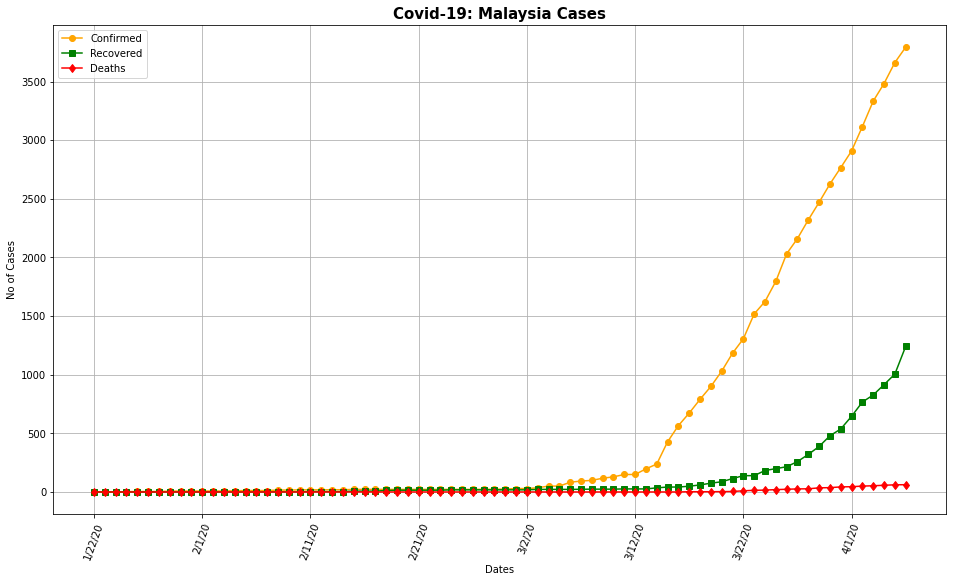

In [0]:
fig, ax = plt.subplots(1,1, figsize=(16,9))
ax = plt.gca()

ax = df_cases_malaysia.plot(kind='line',x='Date',y='Confirmed', color='orange', ax=ax, marker='o')
ax = df_cases_malaysia.plot(kind='line',x='Date',y='Recovered', color='green', ax=ax, marker='s')
ax = df_cases_malaysia.plot(kind='line',x='Date',y='Deaths', color='red', ax=ax, marker='d')
plt.ylabel('No of Cases')
plt.xticks(rotation=70)
plt.xlabel('Dates')
plt.grid(True)
plt.legend(loc=2)
plt.title('Covid-19: Malaysia Cases', fontweight='bold', fontsize=15)

plt.show()

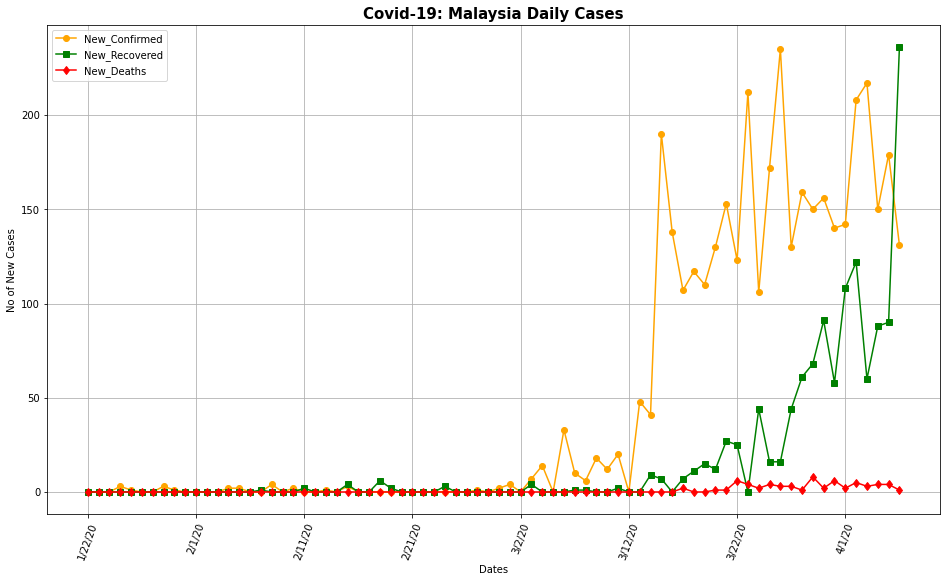

In [0]:
# Line plot
fig, ax = plt.subplots(1,1, figsize=(16,9))
ax = plt.gca()

ax = df_cases_malaysia.plot(kind='line',x='Date',y='New_Confirmed', color='orange', ax=ax, marker='o')
ax = df_cases_malaysia.plot(kind='line',x='Date',y='New_Recovered', color='green', ax=ax, marker='s')
ax = df_cases_malaysia.plot(kind='line',x='Date',y='New_Deaths', color='red', ax=ax, marker='d')
plt.ylabel('No of New Cases')
plt.xticks(rotation=70)
plt.xlabel('Dates')
plt.grid(True)
plt.legend(loc=2)
plt.title('Covid-19: Malaysia Daily Cases', fontweight='bold', fontsize=15)

plt.show()

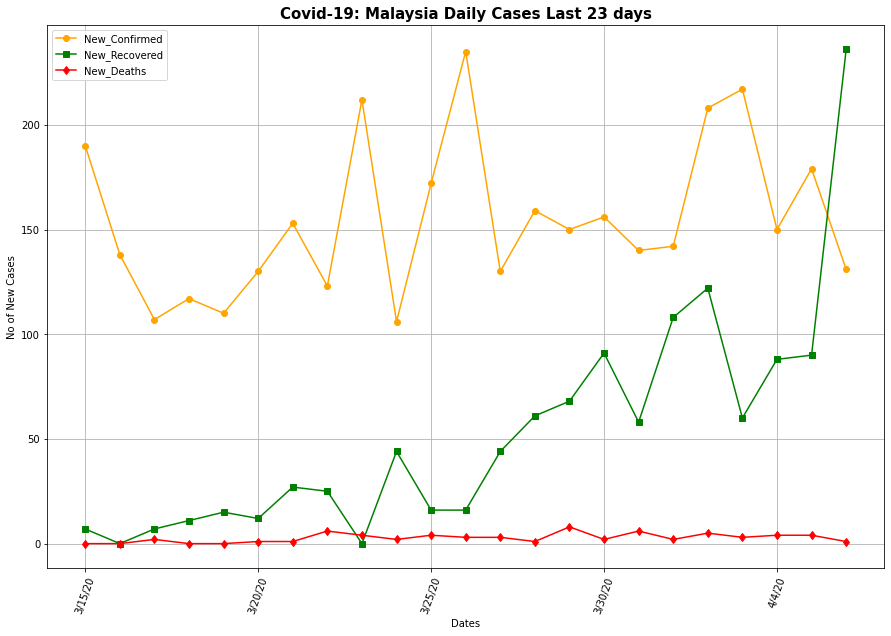

In [0]:
# Line plot
fig, ax = plt.subplots(1,1, figsize=(15,10))
ax = plt.gca()

march = calendar.monthrange(2020, 3)[1]
today_date = date.today()
today_day = int(today_date.strftime("%d"))
yesterday = today_day - 1

# To start from 1st March
#days = march + yesterday

# To start from 15th March
days = 17 + yesterday
df_days = df_cases_malaysia.tail(days)

ax = df_days.plot(kind='line',x='Date',y='New_Confirmed', color='orange', ax=ax, marker='o')
ax = df_days.plot(kind='line',x='Date',y='New_Recovered', color='green', ax=ax, marker='s')
ax = df_days.plot(kind='line',x='Date',y='New_Deaths', color='red', ax=ax, marker='d')
plt.ylabel('No of New Cases')
plt.xticks(rotation=70)
plt.xlabel('Dates')
plt.grid(True)
plt.legend(loc=2)
plt.title('Covid-19: Malaysia Daily Cases Last {} days'.format(days), fontweight='bold', fontsize=15)

plt.show()

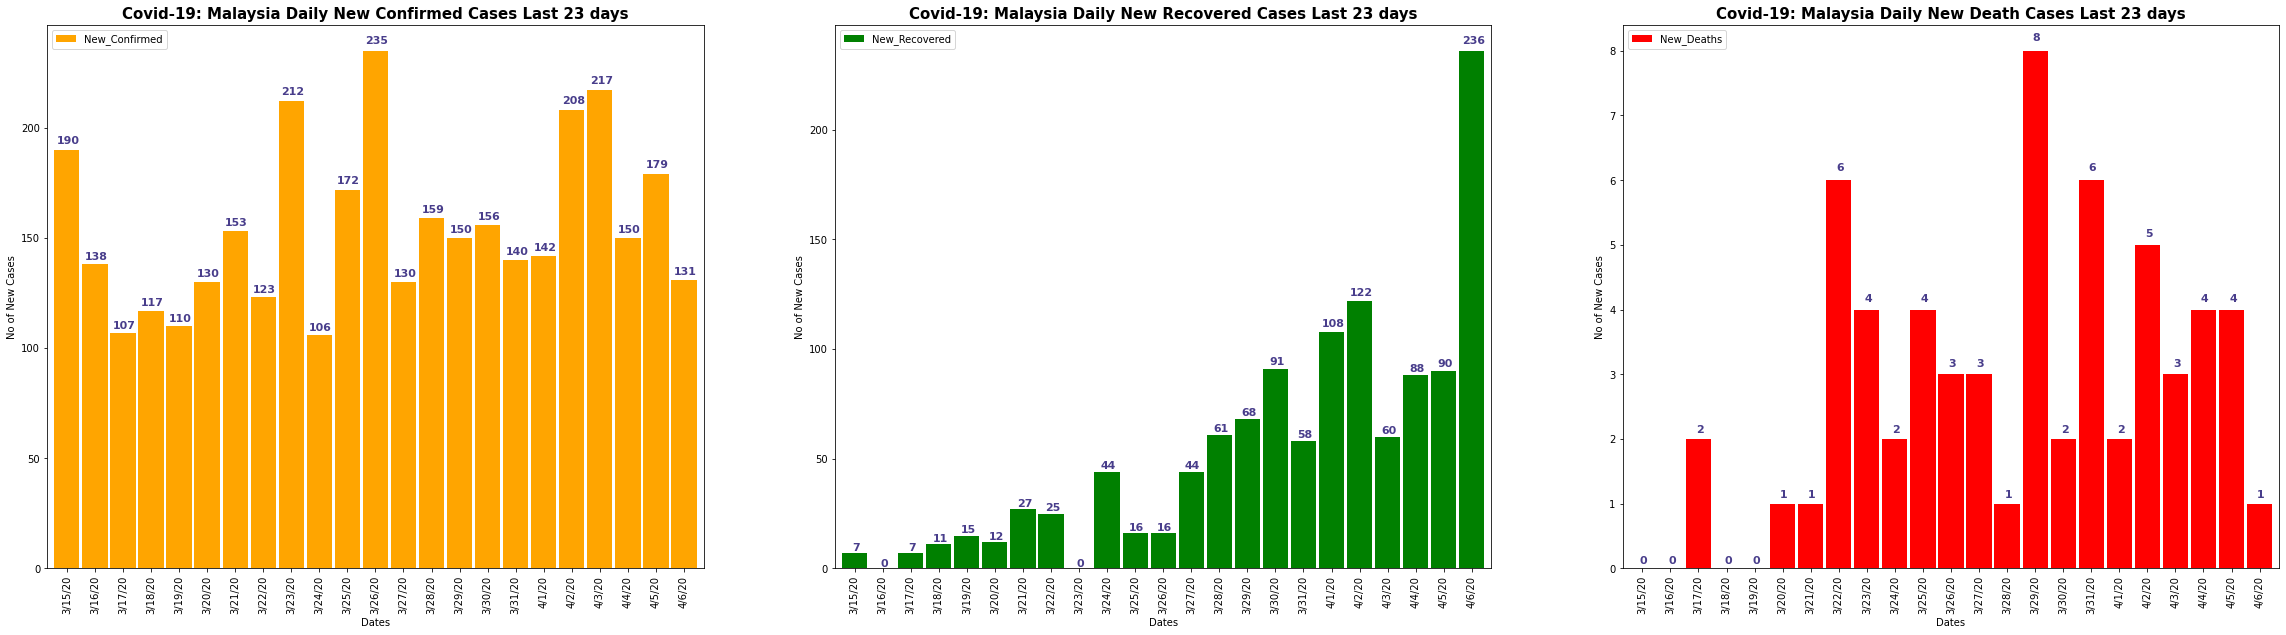

In [0]:
# Bar plot
fig, ax = plt.subplots(1,3, figsize=(40,10))

df_days = df_cases_malaysia.tail(days)
result_table = df_days.set_index('Date')

plt.subplot(1, 3, 1)
ax = result_table.New_Confirmed.plot.bar(color='orange', width=0.9)
plt.ylabel('No of New Cases')
plt.xticks(rotation=90)
plt.xlabel('Dates')
plt.grid(False)
plt.legend(loc=2)
plt.title('Covid-19: Malaysia Daily New Confirmed Cases Last {} days'.format(days), fontweight='bold', fontsize=15)

#label = result_table.New_Confirmed.values.astype(int)
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + 0.5, p.get_height() * 1.01 + 0.05), fontweight='bold', 
                fontsize=11, horizontalalignment='center', verticalalignment='bottom', rotation=0, 
                color='darkslateblue')

plt.subplot(1, 3, 2)
ax = result_table.New_Recovered.plot.bar(color='green', width=0.9)
plt.ylabel('No of New Cases')
plt.xticks(rotation=90)
plt.xlabel('Dates')
plt.grid(False)
plt.legend(loc=2)
plt.title('Covid-19: Malaysia Daily New Recovered Cases Last {} days'.format(days), fontweight='bold', fontsize=15)

#label = result_table.New_Recovered.values.astype(int)
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + 0.5, p.get_height() * 1.01 + 0.05), fontweight='bold', 
                fontsize=11, horizontalalignment='center', verticalalignment='bottom', rotation=0, 
                color='darkslateblue')

plt.subplot(1, 3, 3)
ax = result_table.New_Deaths.plot.bar(color='red', width=0.9)
plt.ylabel('No of New Cases')
plt.xticks(rotation=90)
plt.xlabel('Dates')
plt.grid(False)
plt.legend(loc=2)
plt.title('Covid-19: Malaysia Daily New Death Cases Last {} days'.format(days), fontweight='bold', fontsize=15)

#label = result_table.New_Deaths.values.astype(int)
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + 0.5, p.get_height() * 1.01 + 0.05), fontweight='bold', 
                fontsize=11, horizontalalignment='center', verticalalignment='bottom', rotation=0, 
                color='darkslateblue')

plt.show()

In [0]:
df_cases_malaysia.describe()

,Confirmed,Recovered,Deaths,New_Confirmed,New_Recovered,New_Deaths
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,638.131579,122.263158,7.789474,49.907895,16.328947,0.815789
std,1083.315692,257.747544,16.694363,72.732052,37.932005,1.718220
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.500000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,24.000000,18.000000,0.000000,2.500000,0.000000,0.000000
75%,817.500000,63.750000,2.000000,118.500000,9.500000,0.250000
max,3793.000000,1241.000000,62.000000,235.000000,236.000000,8.000000


In [0]:
df_days.describe()

,Confirmed,Recovered,Deaths,New_Confirmed,New_Recovered,New_Deaths
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,2021.000000,379.434783,25.739130,154.565217,52.434783,2.695652
std,1061.940163,356.482669,21.612743,37.029259,54.258494,2.183300
min,428.000000,42.000000,0.000000,106.000000,0.000000,0.000000
25%,1106.500000,100.500000,3.500000,130.000000,13.500000,1.000000
50%,2031.000000,215.000000,23.000000,150.000000,44.000000,2.000000
75%,2837.000000,591.000000,44.000000,175.500000,78.000000,4.000000
max,3793.000000,1241.000000,62.000000,235.000000,236.000000,8.000000


In [0]:
df_days = df_days.reset_index()
df_days.head()

,index,Date,Confirmed,Recovered,Deaths,New_Confirmed,New_Recovered,New_Deaths
0,53,3/15/20,428,42,0,190.0,7.0,0.0
1,54,3/16/20,566,42,0,138.0,0.0,0.0
2,55,3/17/20,673,49,2,107.0,7.0,2.0
3,56,3/18/20,790,60,2,117.0,11.0,0.0
4,57,3/19/20,900,75,2,110.0,15.0,0.0


In [0]:
df_days = df_days[['Date', 'New_Confirmed']]
df_days.head()

,Date,New_Confirmed
0,3/15/20,190.0
1,3/16/20,138.0
2,3/17/20,107.0
3,3/18/20,117.0
4,3/19/20,110.0


In [0]:
# Prophet requires the date column to be named ds and the feature column to be named y
df_days.rename(columns={'Date':'ds','New_Confirmed':'y'}, inplace=True)
df_days.tail()

,ds,y
18,4/2/20,208.0
19,4/3/20,217.0
20,4/4/20,150.0
21,4/5/20,179.0
22,4/6/20,131.0


In [0]:
df_days.shape

(23, 2)

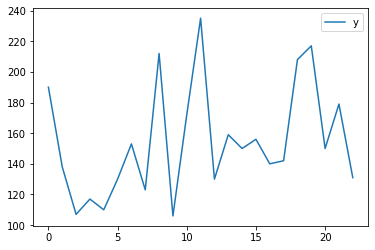

In [0]:
df_days.plot()

In [0]:
# fbprophet 

import fbprophet
from fbprophet import Prophet

#model = Prophet(interval_width=0.8, mcmc_samples=300)
#model = Prophet(mcmc_samples=300)
model = Prophet()
#model.add_seasonality(name = "15 days", period=15, fourier_order=5)

model.fit(df_days)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 17.


In [0]:
# Create Future Dates of 14 days
period = 14
future_dates = model.make_future_dataframe(periods=period)
forecast_days = model.predict(future_dates)
forecast_days[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(period + 1)

,ds,yhat,yhat_lower,yhat_upper
22,2020-04-06,174.147220,136.442389,212.046908
23,2020-04-07,137.521887,99.068307,173.561045
24,2020-04-08,163.526449,124.242508,204.106103
25,2020-04-09,204.199978,163.725307,244.569551
26,2020-04-10,178.863158,136.923015,214.904439
27,2020-04-11,173.862860,134.920456,210.626347
28,2020-04-12,185.330592,145.509961,223.936363
29,2020-04-13,184.080871,145.323829,222.067221
30,2020-04-14,147.455538,109.712953,187.356402
31,2020-04-15,173.460100,132.868942,212.594705


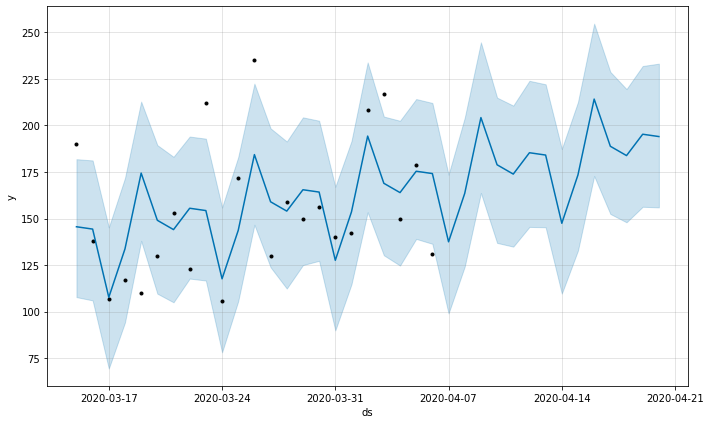

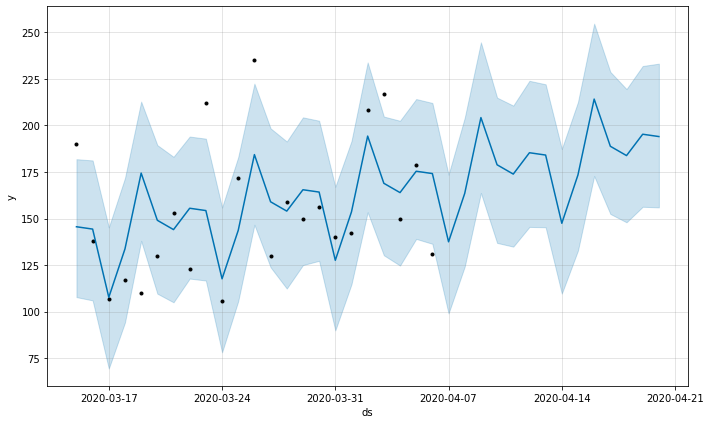

In [0]:
model.plot(forecast_days)

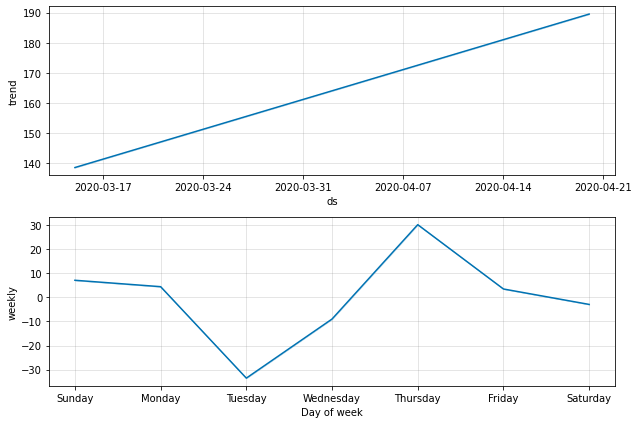

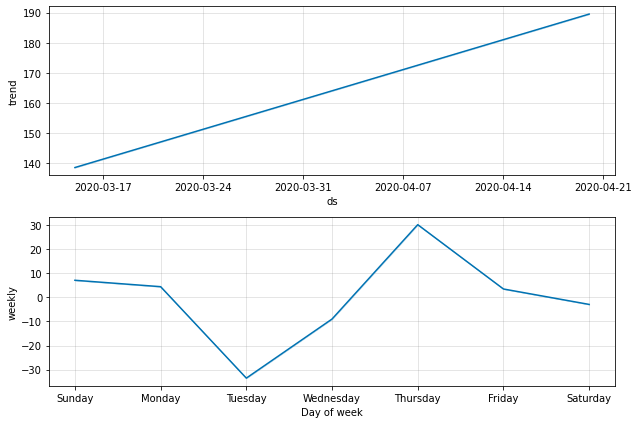

In [0]:
model.plot_components(forecast_days)

In [0]:
# Function to create df forecast and actual values
def make_comparison_df(historical, forecast):
    return forecast.set_index("ds")[["yhat", "yhat_lower", "yhat_upper"]].join(historical.set_index("ds"))
    #return forecast.set_index("ds")[["yhat"]].join(historical.set_index("ds"))

df_compare = make_comparison_df(df_days, forecast_days)
df_compare_forecast = df_compare.copy()
df_compare = df_compare.head(days)

In [0]:
# Metrics calculation by formula 

df = df_compare.copy()
df["e"] = df["y"] - df["yhat"]
mse_f = np.mean(df["e"]**2)
mae_f = np.mean(abs(df["e"]))
rmse_f = np.sqrt(mse_f)
r2_f = 1-(sum(df["e"]**2)/sum((df["y"]-np.mean(df["y"]))**2))
df["p"] = 100 * df["e"] / df["y"]
mape = np.mean(np.abs(df["p"]))

print("Metrics results by manual calculation:")
print("MAE:", np.round(mae_f, 2))
print("MSE:", np.round(mse_f, 2))
print("RMSE:", np.round(rmse_f, 2))
print("R-Squared:", np.round(r2_f, 2))
print("MAPE:", np.round(mape, 2))

Metrics results by manual calculation:
MAE: 23.72
MSE: 904.68
RMSE: 30.08
R-Squared: 0.31
MAPE: 15.47


In [0]:
# Metrics calculation by sklearn.metrics

import sklearn.metrics as metrics

df = df_compare.copy()
mae = metrics.mean_absolute_error(df["y"], df["yhat"])
mse = metrics.mean_squared_error(df["y"], df["yhat"])
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(df["y"], df["yhat"])

print("Metrics results of sklearn.metrics:")
print("MAE:", np.round(mae, 2))
print("MSE:", np.round(mse, 2))
print("RMSE:", np.round(rmse, 2))
print("R-Squared:", np.round(r2, 2))

Metrics results of sklearn.metrics:
MAE: 23.72
MSE: 904.68
RMSE: 30.08
R-Squared: 0.31


In [0]:
# Forecast values
df_compare_forecast.tail(period + 2)

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2020-04-05,175.396941,139.073470,214.155050,179.0
2020-04-06,174.147220,136.442389,212.046908,131.0
2020-04-07,137.521887,99.068307,173.561045,NaN
2020-04-08,163.526449,124.242508,204.106103,NaN
2020-04-09,204.199978,163.725307,244.569551,NaN
2020-04-10,178.863158,136.923015,214.904439,NaN
2020-04-11,173.862860,134.920456,210.626347,NaN
2020-04-12,185.330592,145.509961,223.936363,NaN
2020-04-13,184.080871,145.323829,222.067221,NaN


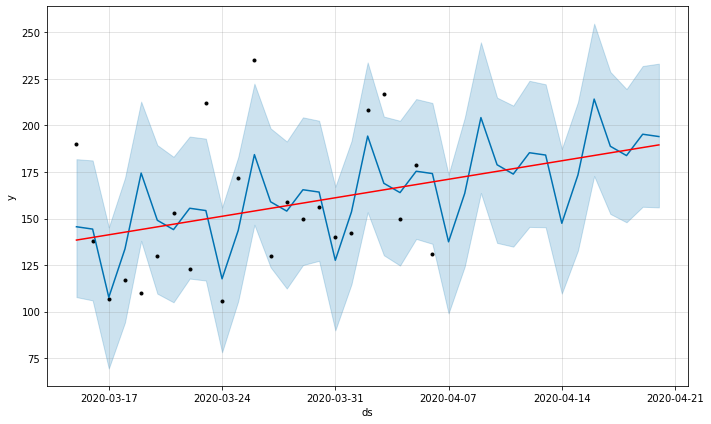

In [0]:
# Find points/dates for change
from fbprophet.plot import add_changepoints_to_plot

fig = model.plot(forecast_days)
chg_dates = add_changepoints_to_plot(fig.gca(), model, forecast_days)

Text(0.5, 1.0, 'Covid-19: Malaysia Daily New Confirmed Cases (Forecast)')

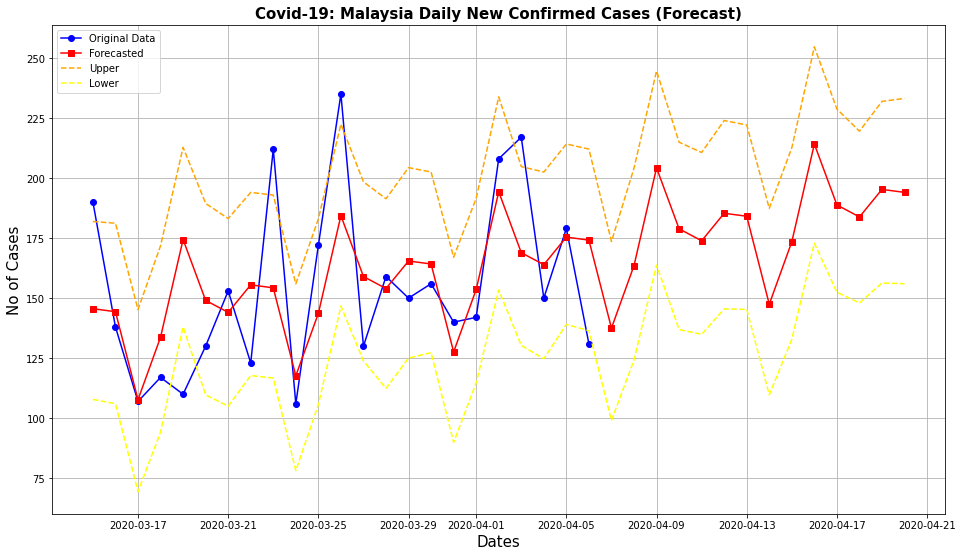

In [0]:
plt.figure(figsize = (16, 9))
plt.plot(df_compare_forecast['y'], color='blue', label="Original Data", marker='o')
plt.plot(df_compare_forecast['yhat'], color='red', label="Forecasted", marker='s')
plt.plot(df_compare_forecast['yhat_upper'], color='orange', label="Upper", linestyle='dashed')
plt.plot(df_compare_forecast['yhat_lower'], color='yellow', label="Lower", linestyle='dashed')
plt.ylabel("No of Cases", fontsize=15)
plt.xlabel("Dates", fontsize=15)
plt.grid(True)
plt.legend(loc=2)
plt.title('Covid-19: Malaysia Daily New Confirmed Cases (Forecast)', fontweight='bold', fontsize=15)

In [0]:
# Cross validation
from fbprophet.diagnostics import cross_validation

#df_cv = cross_validation(model, initial='21 days', period='4 days', horizon='7 days')
df_cv = cross_validation(model, horizon='5 days')
df_cv.head()

INFO:fbprophet:Making 1 forecasts with cutoffs between 2020-04-01 00:00:00 and 2020-04-01 00:00:00
INFO:fbprophet:n_changepoints greater than number of observations. Using 13.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-04-02,188.548526,152.632409,224.116955,208.0,2020-04-01
1,2020-04-03,146.049475,110.439800,180.571319,217.0,2020-04-01
2,2020-04-04,172.049231,137.000921,211.794519,150.0,2020-04-01
3,2020-04-05,175.736447,139.874038,212.154125,179.0,2020-04-01
4,2020-04-06,190.069184,155.673384,225.454459,131.0,2020-04-01


In [0]:
from fbprophet.diagnostics import performance_metrics

df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,1 days,378.359847,19.451474,19.451474,0.093517,0.093517,1.0
1,2 days,5033.976973,70.950525,70.950525,0.326961,0.326961,0.0
2,3 days,486.168579,22.049231,22.049231,0.146995,0.146995,1.0
3,4 days,10.650780,3.263553,3.263553,0.018232,0.018232,1.0
4,5 days,3489.168474,59.069184,59.069184,0.450910,0.450910,0.0


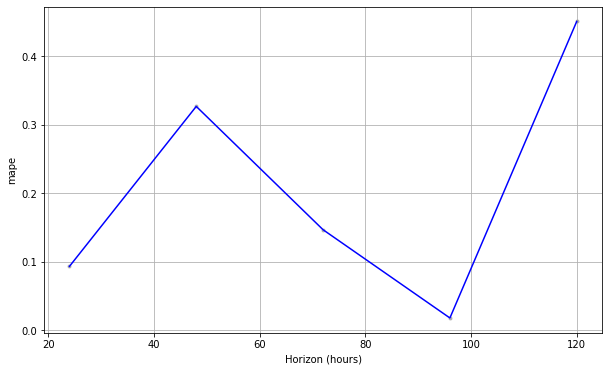

In [0]:
from fbprophet.plot import plot_cross_validation_metric

fig = plot_cross_validation_metric(df_cv, metric='mape')

In [0]:
# Compute cross-validation y and yhat for the range of horizons in the figure
df_cv_new = pd.DataFrame()
#for h in [4, 5, 6, 7, 8]:
for h in [4, 5]:
    df_cv_h = cross_validation(model, horizon='{} days'.format(h))
    df_cv_h['horizon'] = h
    df_cv_new = pd.concat((df_cv_new, df_cv_h))

# Compute absolute percent error for each prediction
df_cv_new['mape'] = np.abs((df_cv_new['y'] - df_cv_new['yhat']) / df_cv_new['y'])
# mean absolute percent error, by horizon
mape = df_cv_new.groupby('horizon', as_index=False).aggregate({'mape': 'mean'})
mape

INFO:fbprophet:Making 4 forecasts with cutoffs between 2020-03-27 00:00:00 and 2020-04-02 00:00:00
INFO:fbprophet:n_changepoints greater than number of observations. Using 9.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.
INFO:fbprophet:n_changepoints greater than number of observations. Using 12.
INFO:fbprophet:n_changepoints greater than number of observations. Using 14.
INFO:fbprophet:Making 1 forecasts with cutoffs between 2020-04-01 00:00:00 and 2020-04-01 00:00:00
INFO:fbprophet:n_changepoints greater than number of observations. Using 13.


,horizon,mape
0,4,0.205633
1,5,0.207323


In [0]:
df_cv_new

,ds,yhat,yhat_lower,yhat_upper,y,cutoff,horizon,mape
0,2020-03-28,183.991013,145.501393,224.072686,159.0,2020-03-27,4,0.157176
1,2020-03-29,202.996822,164.196066,242.422098,150.0,2020-03-27,4,0.353312
2,2020-03-30,221.497766,184.149484,257.873172,156.0,2020-03-27,4,0.419857
3,2020-03-31,152.996242,115.321804,191.271636,140.0,2020-03-27,4,0.092830
4,2020-03-30,201.853673,163.328770,238.870269,156.0,2020-03-29,4,0.293934
5,2020-03-31,133.354770,96.982158,168.910936,140.0,2020-03-29,4,0.047466
6,2020-04-01,171.354300,133.365572,208.811217,142.0,2020-03-29,4,0.206720
7,2020-04-02,199.353976,162.578550,237.503971,208.0,2020-03-29,4,0.041567
8,2020-04-01,164.006820,126.076703,200.413408,142.0,2020-03-31,4,0.154978
9,2020-04-02,192.005737,155.126265,226.479886,208.0,2020-03-31,4,0.076895
